In [1]:
import pandas as pd

# Load the datasets
price_data_path = "price_data.csv"
client_data_path = "client_data.csv"

price_data = pd.read_csv(price_data_path)
client_data = pd.read_csv(client_data_path)

# Display the first few rows of each dataset
price_data.head(), client_data.head()

(                                 id  price_date  price_off_peak_var  \
 0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
 1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
 2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
 3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
 4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
 
    price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
 0             0.0                 0.0           44.266931             0.0   
 1             0.0                 0.0           44.266931             0.0   
 2             0.0                 0.0           44.266931             0.0   
 3             0.0                 0.0           44.266931             0.0   
 4             0.0                 0.0           44.266931             0.0   
 
    price_mid_peak_fix  
 0                 0.0  
 1                 0.0  
 2                 0.

In [2]:
# Data types of each column
price_data_dtypes = price_data.dtypes
client_data_dtypes = client_data.dtypes

# Descriptive statistics
price_data_desc = price_data.describe()
client_data_desc = client_data.describe()

price_data_dtypes, client_data_dtypes, price_data_desc, client_data_desc

(id                     object
 price_date             object
 price_off_peak_var    float64
 price_peak_var        float64
 price_mid_peak_var    float64
 price_off_peak_fix    float64
 price_peak_fix        float64
 price_mid_peak_fix    float64
 dtype: object,
 id                                 object
 channel_sales                      object
 cons_12m                            int64
 cons_gas_12m                        int64
 cons_last_month                     int64
 date_activ                         object
 date_end                           object
 date_modif_prod                    object
 date_renewal                       object
 forecast_cons_12m                 float64
 forecast_cons_year                  int64
 forecast_discount_energy          float64
 forecast_meter_rent_12m           float64
 forecast_price_energy_off_peak    float64
 forecast_price_energy_peak        float64
 forecast_price_pow_off_peak       float64
 has_gas                            object
 imp_

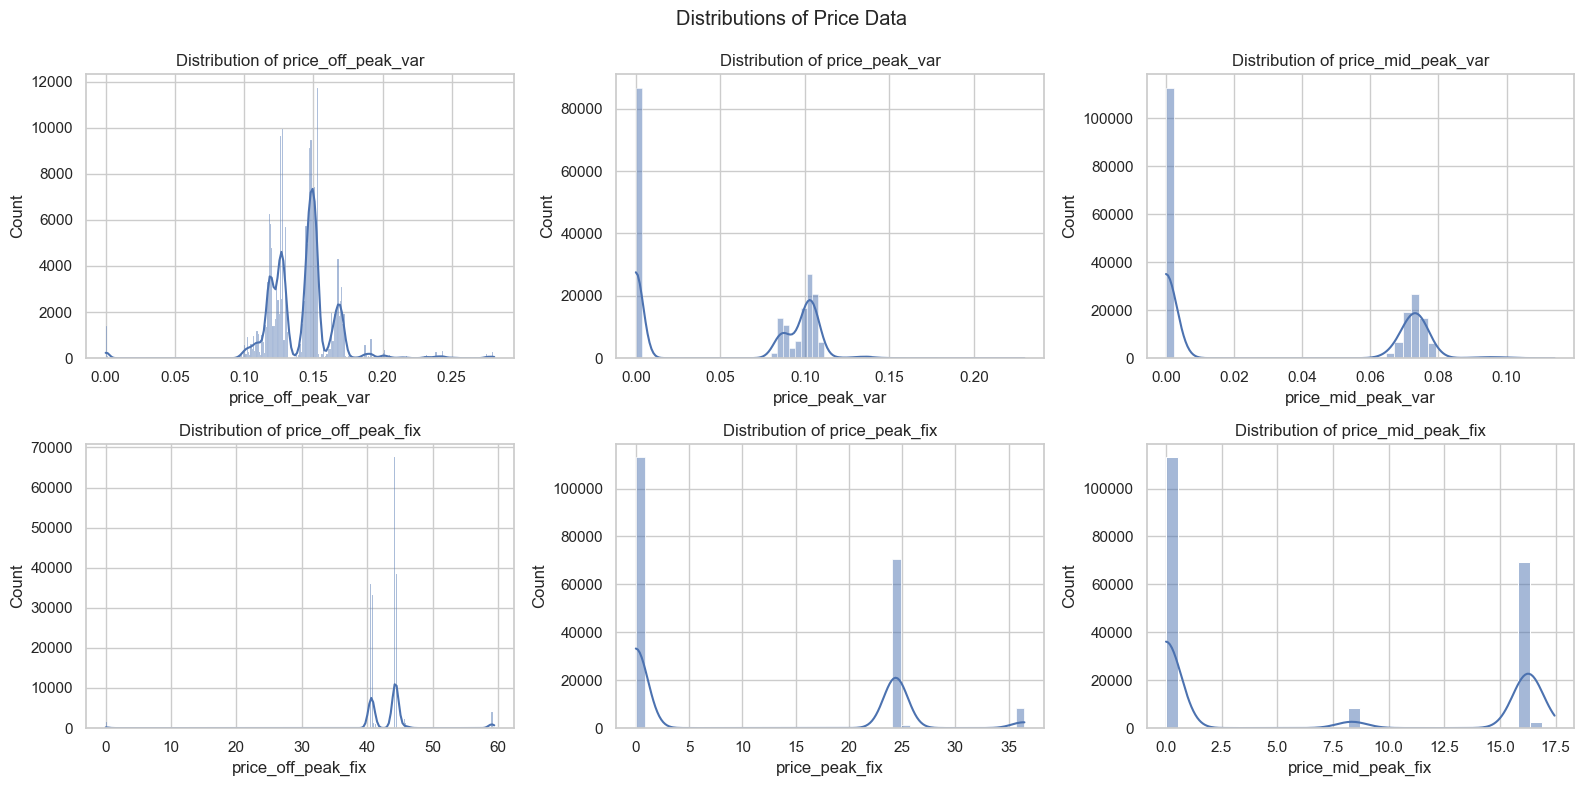

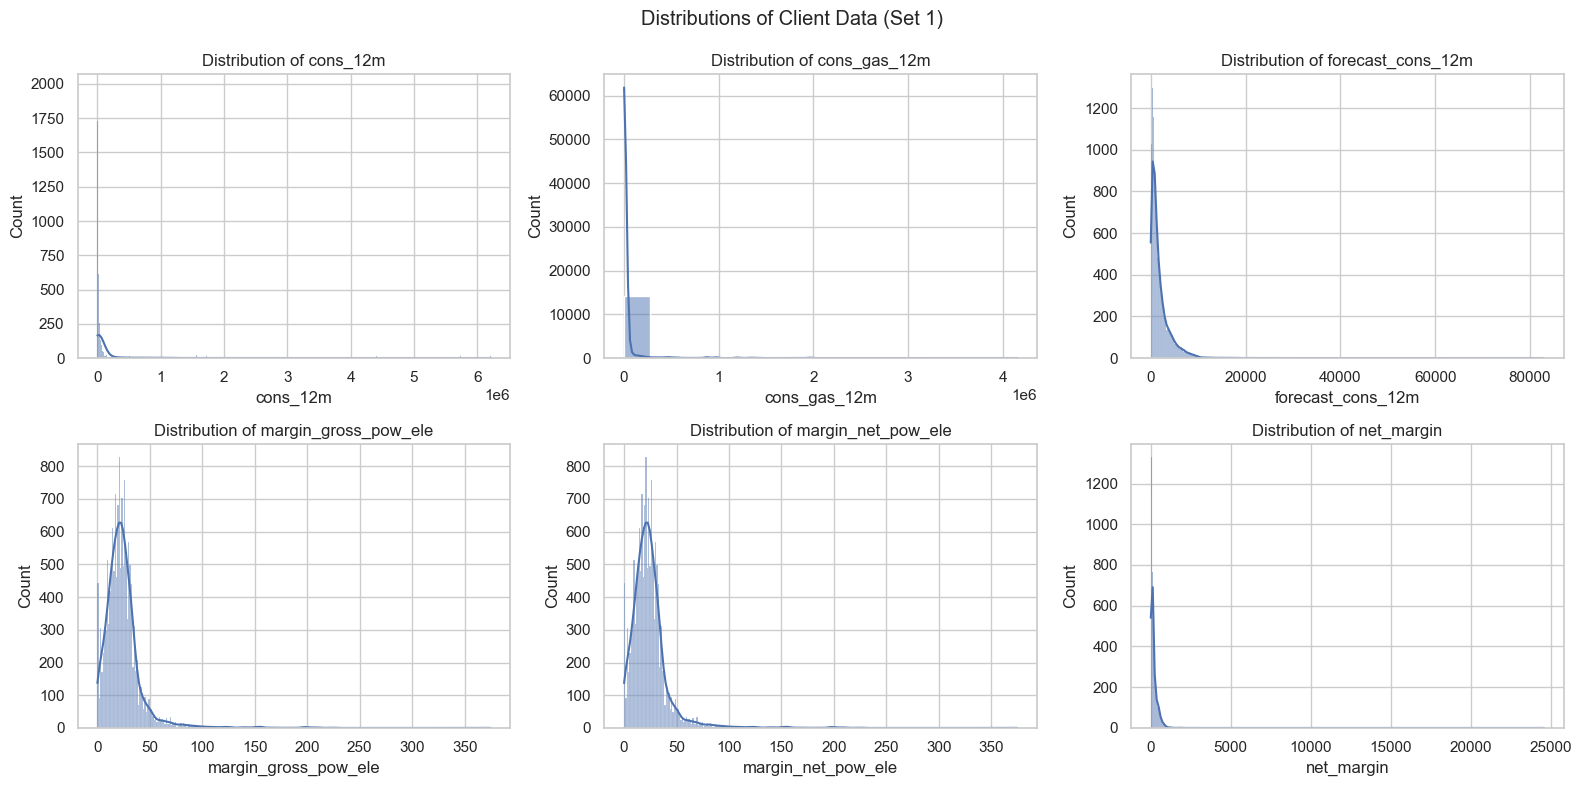

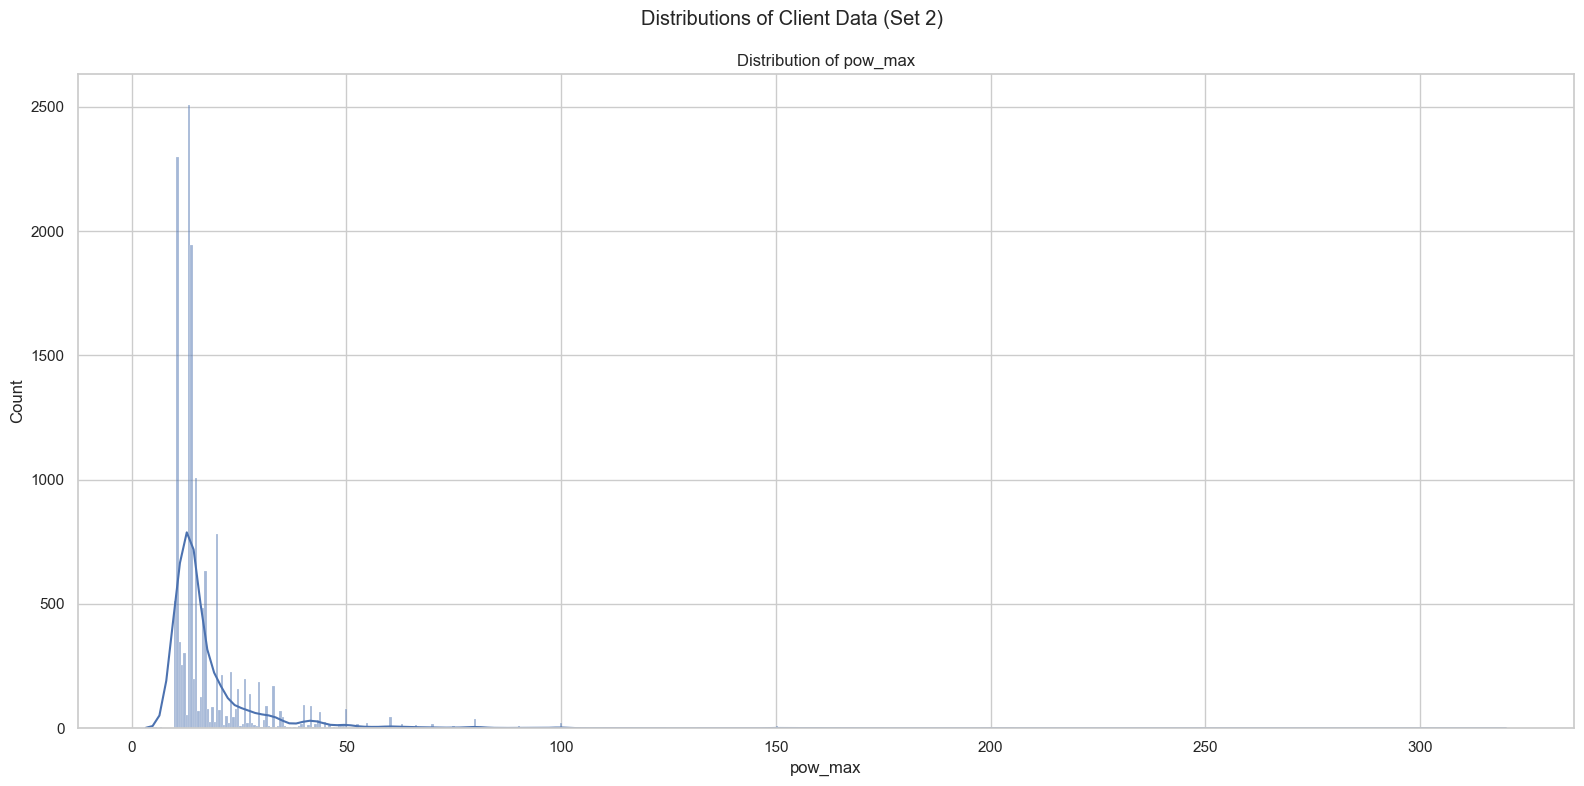

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Function to create distribution plots
def plot_distributions_split(data, cols, title, rows=2, cols_per_row=3):
    plt.figure(figsize=(16, 8))
    for i, col in enumerate(cols, 1):
        plt.subplot(rows, cols_per_row, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Columns to plot
price_cols = ["price_off_peak_var", "price_peak_var", "price_mid_peak_var", 
              "price_off_peak_fix", "price_peak_fix", "price_mid_peak_fix"]
client_cols = ["cons_12m", "cons_gas_12m", "forecast_cons_12m", 
               "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin", 
               "pow_max"]

# Plot distributions for price data
plot_distributions_split(price_data, price_cols, 'Distributions of Price Data')

# Split client columns into two sets to avoid subplot overflow
client_cols_set1 = client_cols[:6]
client_cols_set2 = client_cols[6:]

# Plot distributions for client data (set 1)
plot_distributions_split(client_data, client_cols_set1, 'Distributions of Client Data (Set 1)', rows=2, cols_per_row=3)

# Plot distributions for client data (set 2)
plot_distributions_split(client_data, client_cols_set2, 'Distributions of Client Data (Set 2)', rows=1, cols_per_row=1)

In [7]:
import pandas as pd

# Load datasets
price_data = pd.read_csv('price_data.csv')
client_data = pd.read_csv('client_data.csv')
clean_data = pd.read_csv('clean_data_after_eda.csv')

# Remove irrelevant columns from price_data and client_data
price_data = price_data.drop(columns=['id', 'price_date'], errors='ignore')
client_data = client_data.drop(columns=['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], errors='ignore')

# Expand date columns in clean_data (if they exist)
if 'date_activ' in clean_data.columns:
    clean_data['year_activ'] = pd.to_datetime(clean_data['date_activ']).dt.year
    clean_data['month_activ'] = pd.to_datetime(clean_data['date_activ']).dt.month
    clean_data['day_activ'] = pd.to_datetime(clean_data['date_activ']).dt.day

if 'date_end' in clean_data.columns:
    clean_data['year_end'] = pd.to_datetime(clean_data['date_end']).dt.year
    clean_data['month_end'] = pd.to_datetime(clean_data['date_end']).dt.month
    clean_data['day_end'] = pd.to_datetime(clean_data['date_end']).dt.day

if 'date_modif_prod' in clean_data.columns:
    clean_data['year_modif_prod'] = pd.to_datetime(clean_data['date_modif_prod']).dt.year
    clean_data['month_modif_prod'] = pd.to_datetime(clean_data['date_modif_prod']).dt.month
    clean_data['day_modif_prod'] = pd.to_datetime(clean_data['date_modif_prod']).dt.day

if 'date_renewal' in clean_data.columns:
    clean_data['year_renewal'] = pd.to_datetime(clean_data['date_renewal']).dt.year
    clean_data['month_renewal'] = pd.to_datetime(clean_data['date_renewal']).dt.month
    clean_data['day_renewal'] = pd.to_datetime(clean_data['date_renewal']).dt.day

# Drop the original date columns from clean_data
clean_data = clean_data.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], errors='ignore')

# Combine columns to create new features in clean_data
clean_data['consumption_ratio'] = clean_data['cons_12m'] / clean_data['cons_last_month']
clean_data['forecast_margin'] = clean_data['forecast_cons_12m'] * clean_data['forecast_price_energy_off_peak']

# Merge client_data and price_data into clean_data
# Assuming 'id' is the common key and it exists in clean_data as well
if 'id' in price_data.columns and 'id' in client_data.columns:
    merged_data = pd.merge(clean_data, client_data, on='id', how='inner')
    merged_data = pd.merge(merged_data, price_data, on='id', how='inner')
else:
    print("ID column missing in one of the datasets")

# Save the cleaned and feature engineered dataset
merged_data.to_csv('cleaned_feature_engineered_data.csv', index=False)

ID column missing in one of the datasets


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the final dataset
data_path = "data_for_predictions.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the final dataset
data_path = "data_for_predictions.csv"
data = pd.read_csv(data_path)

# Drop the Unnamed: 0 and id columns as they are not needed for the prediction
data = data.drop(columns=['Unnamed: 0', 'id'])

# Check for null values and handle them if any
print(data.isnull().sum())
data = data.dropna()

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features and target variable
X = data.drop(columns=['churn'])
y = data['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
forecast_cons_12m                             0
forecast_discount_energy                      0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 62, dtype: int64
Accuracy: 0.8986995208761123
Confusion Matrix:
[[2611    6]
 [ 290   15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.71      0.05      0.09       305

    accuracy                           0.90      2922
   macro avg       0.81      0.52      0.52      2922
weighted avg       0.88      0.90      0.86      2922

